<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE60499](https://ndcbe.github.io/CBE60499);
content is available [on Github](git@github.com:ndcbe/CBE60499.git).*


<!--NAVIGATION-->
< [3.1 Linear Algebra Review and SciPy Basics](https://ndcbe.github.io/CBE60499/03.01-Math-Primer.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [3.3 Unconstrained Optimality Conditions](https://ndcbe.github.io/CBE60499/03.03-Optimality.html)<p><a href="https://colab.research.google.com/github/ndcbe/CBE60499/blob/master/docs/03.02-Math-Primer-2.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/CBE60499/03.02-Math-Primer-2.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 3.2 Mathematics Primer


In [1]:
# Load required Python libraries.
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## 3.2.1 Eigenvalues and Quadratic Programs

**Main Idea**: By looking at an unconstrained quadratic optimization problem, we will see how the eigenvalues tell us about the curvature (second derivatives) and help us classify the stationary points.

**Reference**: Section *2.2.2 Quadratic Forms* in Biegler (2010)

![Book](figures/quad1.png)

### 3.2.1.1 Analysis Algorithm

We will start by defining a functon for our classification procedure.

In [2]:
# The main event
def quad_analyze(c, a, B):
    '''
    Analyze the stationary points of a quadratic objective.
    
    Inputs:
        c - offset (scalar)
        a - linear coefficients (vector)
        B - quadratic coefficients (matrix)
    
    Outputs:
        None
    
    Displayed:
        1. Inputs
        2. Eigenvalues and eigenvectors
        3. Stationary point (transformed coordinates)
        4. Stationary point (original coordinates)
        5. Function value and gradient at stationary point
        6. 3D plot
    '''
    
    ### Display inputs
    print("***Inputs***")
    print("c = ",c,"\n")
    print("a = ",a,"\n")
    print("B = \n",B,"\n")
    
    ### Eigendecomposition
    print("***Eigendecomposition***")
    l, V = linalg.eig(B)
    print("Lambda = \n",np.diag(l),"\n")
    print("V = \n",V,"\n")
    
    ### Calculate stationary point
    n = len(a)
    zstar = np.zeros(n)
    
    abar = (V.transpose()).dot(a)
    print("abar = \n",abar,"\n")
    
    # Loop over dimensions
    for j in range(0,n):
        # If eigenvalue is NOT zero
        ##
        # Previous code
        # if(l[j] != 0):
        ##
        # More stable version
        if(abs(l[j]) > 1E-8):
            zstar[j] = -abar[j]/np.real(l[j])
        
        # Otherwise check is abar is nonzero
        elif(abar[j] !=0):
            print("WARNING: No stationary point exists.")
    
    xstar = V.dot(zstar)
    
    print("***(Possible) Stationary Point in Transformed Coordinates:")
    print("z* = ",zstar,"\n")
    
    print("***(Possible) Stationary Point in Original Coordinates:")
    print("x* = ",xstar,"\n")
    
    ### Check function value and gradient
    fval = c + a.dot(xstar) + 0.5*xstar.dot(B.dot(xstar))
    grad = a + xstar.dot(B)
    
    print("***Checking function and gradient***")
    print("f(x*) = ",fval)
    print("f'(x*) = \n",grad,"\n")
    
    ### Make 3D plot
    # Tutorial: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    if(n == 2):
        # Create vectors in both dimensions
        dx = 5
        x1 = np.arange(xstar[0]-dx,xstar[0]+dx,0.25)
        x2 = np.arange(xstar[1]-dx,xstar[1]+dx,0.25)
        
        # Create a matrix of all points to sample
        X1, X2 = np.meshgrid(x1, x2)
        n1 = len(x1)
        n2 = len(x2)
        F = np.zeros([n2, n1])
        xtemp = np.zeros(2)
        for i in range(0,n1):
            xtemp[0] = x1[i]
            for j in range(0,n2):
                xtemp[1] = x2[j]
                F[j,i] = c + a.dot(xtemp) + 0.5*xtemp.dot(B.dot(xtemp))
        
        # Create 3D figure
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        
        # Plot f(x)
        surf = ax.plot_surface(X1, X2, F, linewidth=0,cmap=cm.coolwarm,antialiased=True)
        
        # Add (possible) stationary point
        ax.scatter(xstar[0],xstar[1],fval,s=50,color="green",depthshade=True)
        
        # Draw vertical line through stationary point to help visualization
        # Maximum value in array
        fmax = np.amax(F)
        fmin = np.amin(F)
        ax.plot([xstar[0], xstar[0]], [xstar[1], xstar[1]], [fmin,fmax],color="green")
        
        plt.show()

### 3.2.1.2 Excercise 2.8 in Biegler (2010)

***Inputs***
c =  0 

a =  [1 1] 

B = 
 [[2 1]
 [1 2]] 

***Eigendecomposition***
Lambda = 
 [[3.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]] 

V = 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

abar = 
 [1.41421356 0.        ] 

***(Possible) Stationary Point in Transformed Coordinates:
z* =  [-0.47140452 -0.        ] 

***(Possible) Stationary Point in Original Coordinates:
x* =  [-0.33333333 -0.33333333] 

***Checking function and gradient***
f(x*) =  -0.3333333333333333
f'(x*) = 
 [2.22044605e-16 2.22044605e-16] 



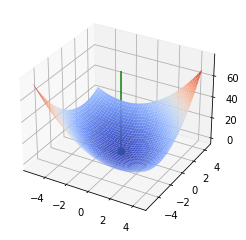

In [3]:
c = 0
a = np.array([1, 1])
B = np.array([[2,1],[1,2]])

quad_analyze(c,a,B)

### 3.2.1.3 Activity 1

Classify the stationary point for $f(x) = x_1 + x_2$.

***Inputs***
c =  0 

a =  [1 1] 

B = 
 [[0. 0.]
 [0. 0.]] 

***Eigendecomposition***
Lambda = 
 [[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]] 

V = 
 [[1. 0.]
 [0. 1.]] 

abar = 
 [1. 1.] 

***(Possible) Stationary Point in Transformed Coordinates:
z* =  [0. 0.] 

***(Possible) Stationary Point in Original Coordinates:
x* =  [0. 0.] 

***Checking function and gradient***
f(x*) =  0.0
f'(x*) = 
 [1. 1.] 



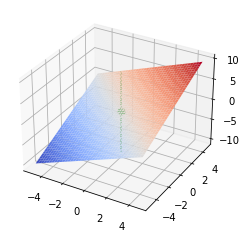

In [4]:
# YOUR SOLUTION HERE

### 3.2.1.4 Activity 2

Classify the stationary point for $f(x) = x_1^2 + x_2^2 - 2x_1 x_2 + 0 x_1 - 0 x_2$ + 3.

Hint: $B$ needs to be symmetric.

***Inputs***
c =  3 

a =  [0 0] 

B = 
 [[ 2 -2]
 [-2  2]] 

***Eigendecomposition***
Lambda = 
 [[4.0000000e+00+0.j 0.0000000e+00+0.j]
 [0.0000000e+00+0.j 4.4408921e-16+0.j]] 

V = 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]] 

abar = 
 [0. 0.] 

***(Possible) Stationary Point in Transformed Coordinates:
z* =  [-0.  0.] 

***(Possible) Stationary Point in Original Coordinates:
x* =  [0. 0.] 

***Checking function and gradient***
f(x*) =  3.0
f'(x*) = 
 [0. 0.] 



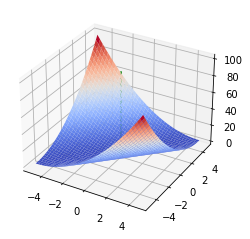

In [5]:
# YOUR SOLUTION HERE

## 3.2.2 Classifying Functions (Key Concepts from Real Analysis)

## 3.2.3 Taylor Series Approximation

## 3.2.4 Finite Difference Approximation

**Main Idea**: This example complements in class example where we use Taylor series expansions to estimate trunction error for forward, backward, and central finite difference formulas. We will revisit finite difference formulas again in a few lectures.

Consider the following test function:
$$ f(x) = e^{x} $$

with

$$f'(x) = e^{x}$$

In [6]:
# Define the test function
def my_f(x):
    return np.exp(x)

# Specify point to examine
a = 1.0

# Calculate function value at x = a
fa = my_f(a)

# Calculate exact first derivative at x=1
df1 = my_f(a) # Need to replace if you consider a different test function!

# Generate values for epsilon
eps = np.power(10,np.arange(-16,1,0.25))
n = len(eps)

### 3.2.4.1 Forward Finite Difference

$$ f'_f(a) = \frac{f(a+\epsilon) - f(a)}{\epsilon} $$

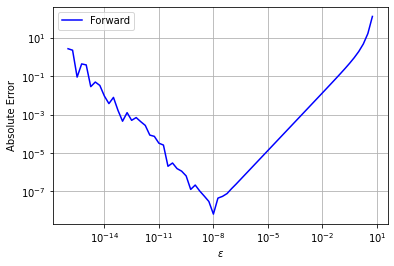

In [7]:
# Preallocate error array
error_forward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_forward = (my_f(a + eps[i]) - fa)/eps[i]
    error_forward[i] = abs(df1_forward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid()
plt.show()


### 3.2.4.2 Backward Finite Difference

$$ f'_b(a) = \frac{f(a) - f(a - \epsilon)}{-\epsilon} $$

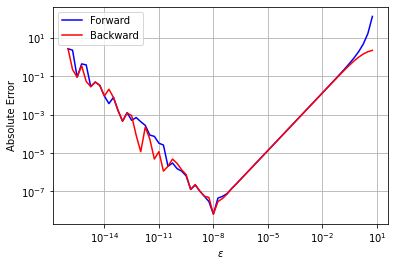

In [8]:
# Preallocate error array
error_backward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_backward = (fa - np.exp(a - eps[i]))/eps[i]
    error_backward[i] = abs(df1_backward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()

### 3.2.4.3 Central Finite Difference

$$ f'_c(a) = \frac{f(a+\epsilon) - f(a - \epsilon)}{2 \epsilon} $$

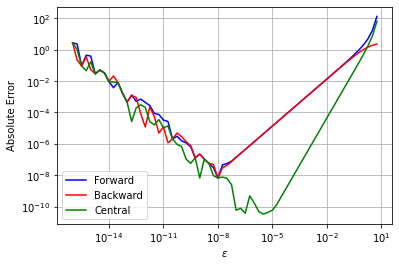

In [9]:
# Preallocate error array
error_central = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_central = (np.exp(a + eps[i]) - np.exp(a - eps[i]))/(2*eps[i])
    error_central[i] = abs(df1_central - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.loglog(eps,error_central,label="Central",color="green")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()

### 3.2.4.4 Activity
1. Record the results for the test function $f(x) = e^x$ at $x=1$.
2. Try the point $x=10$ and record the results.
3. Try a different test function.

#### 3.2.4.4.1 Original: $f(x) = e^{x}$ at $x=1$

**Forward**: Lowest absolute error of $10^{-8}$ at $\epsilon$ = $10^{-8}$

**Backward**: Lowest absolute error of $10^{-8}$ at $\epsilon$ = $10^{-8}$

**Central**: Lowest absolute error of $10^{-10}$ at $\epsilon$ = $10^{-6}$


#### 3.2.4.4.2 Variant: $f(x) = e^{x}$ at $x=10$

**Forward**: Lowest absolute error of $10^{-8}$ at $\epsilon$ = $10^{-8}$

**Backward**: Lowest absolute error of $10^{-8}$ at $\epsilon$ = $10^{-8}$

**Central**: Lowest absolute error of $10^{-10}$ at $\epsilon$ = $10^{-6}$

#### 3.2.4.4.3 Your own test function

**Forward**: Lowest absolute error of ... at $\epsilon$ = ...

**Backward**: 

**Central**:

#### 3.2.4.4.4 Discussion

Are there any general trends from these (limited) computational experiments?

What is the best $\epsilon$ for an arbitrary function?

<!--NAVIGATION-->
< [3.1 Linear Algebra Review and SciPy Basics](https://ndcbe.github.io/CBE60499/03.01-Math-Primer.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [3.3 Unconstrained Optimality Conditions](https://ndcbe.github.io/CBE60499/03.03-Optimality.html)<p><a href="https://colab.research.google.com/github/ndcbe/CBE60499/blob/master/docs/03.02-Math-Primer-2.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/CBE60499/03.02-Math-Primer-2.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>